In [25]:
#task 1 : 1.	Data Cleaning and Preparation

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Loading the dataset into a DataFrame
import pandas as pd
import numpy as np
df =  pd.read_csv("Cardiotocographic.csv")

#Handling missing values appropriately 
print(df.isnull().sum())
df.dropna(inplace=True)
print("After handling missing values:")
print(df.isnull().sum())

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64
After handling missing values:
LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


In [39]:
#We treat any record whose NSP is not exactly 1, 2, or 3 as an outlier and remove it

# Examine NSP (fetal state) values
print("Unique NSP values:", df['NSP'].unique()[:10])
print(df['NSP'].value_counts().head())

df = df[df['NSP'].isin([1.0, 2.0, 3.0])].reset_index(drop=True)
df['NSP'] = df['NSP'].astype(int)  # ensure integer class
print(f"After cleaning NSP: {df.shape}, NSP value counts:\n{df['NSP'].value_counts()}")


Unique NSP values: [2 1 3]
NSP
1    1238
2     232
3      96
Name: count, dtype: int64
After cleaning NSP: (1566, 14), NSP value counts:
NSP
1    1238
2     232
3      96
Name: count, dtype: int64


In [27]:
# Check for negative or invalid values in numeric features and removing the values
neg_cols = ['AC','DL','DS','DP','UC','FM','ALTV','MLTV','Width','ASTV','MSTV','Tendency']
for col in neg_cols:
    neg_count = (df[col] < 0).sum()
    if neg_count:
        print(f"{col}: {neg_count} negative values , removing them.")
        df = df[df[col] >= 0]
df = df.reset_index(drop=True)
print(f"After removing negative outliers: {df.shape}")

AC: 28 negative values , removing them.
DL: 34 negative values , removing them.
DS: 51 negative values , removing them.
DP: 40 negative values , removing them.
UC: 13 negative values , removing them.
FM: 42 negative values , removing them.
ALTV: 34 negative values , removing them.
MLTV: 7 negative values , removing them.
Width: 4 negative values , removing them.
ASTV: 4 negative values , removing them.
MSTV: 2 negative values , removing them.
Tendency: 165 negative values , removing them.
After removing negative outliers: (1566, 14)


In [28]:
#task 2 :	Statistical Summary:

# Calculate and print the statistical summary
print(df.describe().T[['mean','50%','std','25%','75%']].round(3))


# Calculate the interquartile range (IQR) for each numerical column
print("\nInterquartile Range (IQR):")
print(df.quantile(0.75) - df.quantile(0.25))

#detecting outliers and removing the outliers
outlierss = []
def detect_outliers_iqr(df):
    outlier_dict = {}
    numeric_cols = df.select_dtypes(include=['number']).columns

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlierss.append(outliers)
        outlier_dict[col] = outliers.shape[0]
        print(f"{col}: {outliers.shape[0]} outliers detected")

    return outlier_dict

# Run the function
outliers_found = detect_outliers_iqr(df)




#Key interesting findings :-
#LB column is symmetrical shape data (mean = median = mode)
#Most of the columns are Highly skewed( median < mean)
#most of the columns have high variability.
#All columns contains outliers(extreme values) but FM, DP, DS, DL, ALTV contains more extreme values.
#These statistics highlight unusual features: most deceleration/acceleration counts are zero, and variability measures (ASTV, ALTV) are widely spread, suggesting varied fetal conditions in the data.


             mean      50%     std      25%      75%
LB        134.174  134.000  11.134  127.000  141.000
AC          0.003    0.002   0.004    0.000    0.006
FM          0.011    0.000   0.066    0.000    0.003
UC          0.004    0.004   0.003    0.002    0.007
DL          0.002    0.000   0.003    0.000    0.003
DS          0.000    0.000   0.000    0.000    0.000
DP          0.000    0.000   0.001    0.000    0.000
ASTV       46.873   48.000  17.559   32.000   61.000
MSTV        1.352    1.200   1.116    0.700    1.700
ALTV       10.455    0.000  20.563    0.000   11.000
MLTV        8.591    7.500   7.345    4.800   11.000
Width      70.402   68.000  40.103   37.000   99.000
Tendency    0.446    0.000   0.512    0.000    1.000
NSP         1.271    1.000   0.566    1.000    1.000

Interquartile Range (IQR):
LB          14.000000
AC           0.005846
FM           0.002512
UC           0.004679
DL           0.003335
DS           0.000000
DP           0.000000
ASTV        29.000000
M

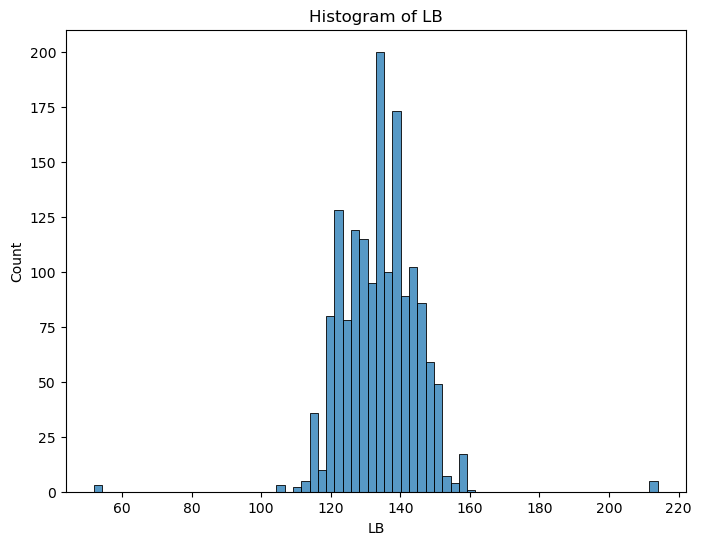

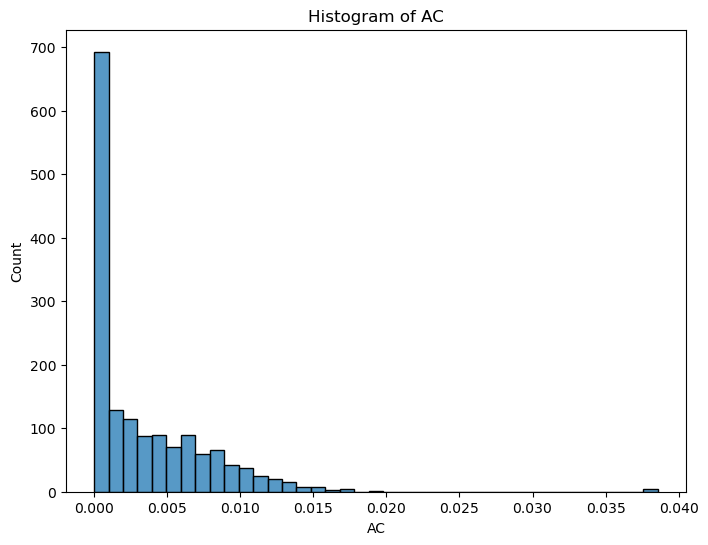

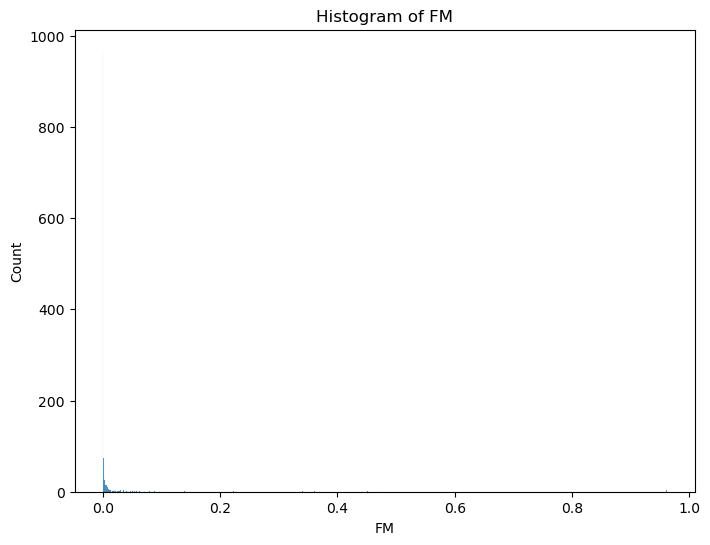

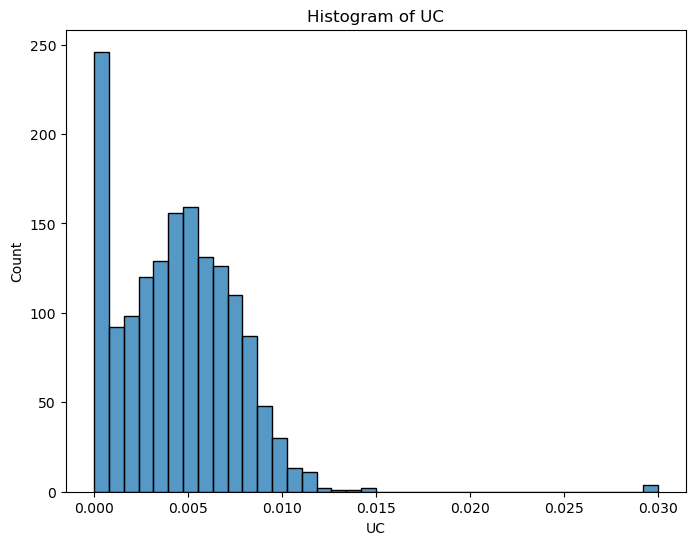

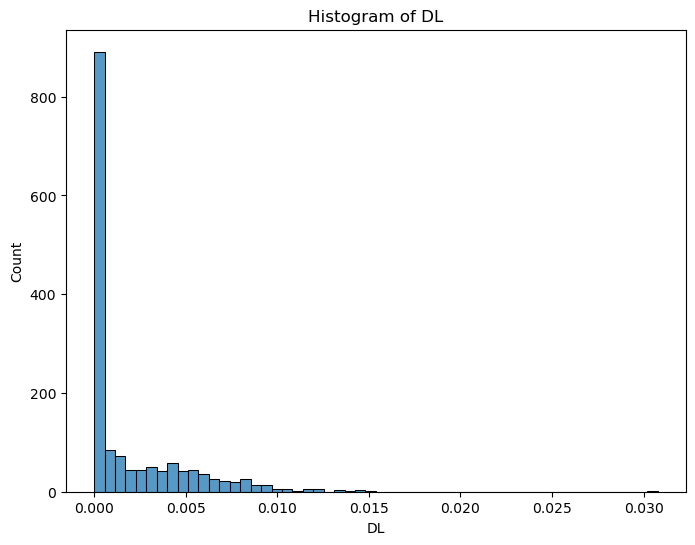

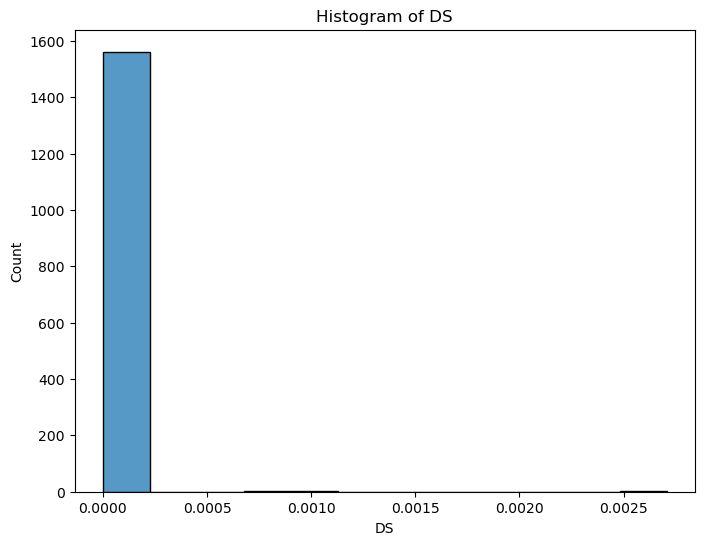

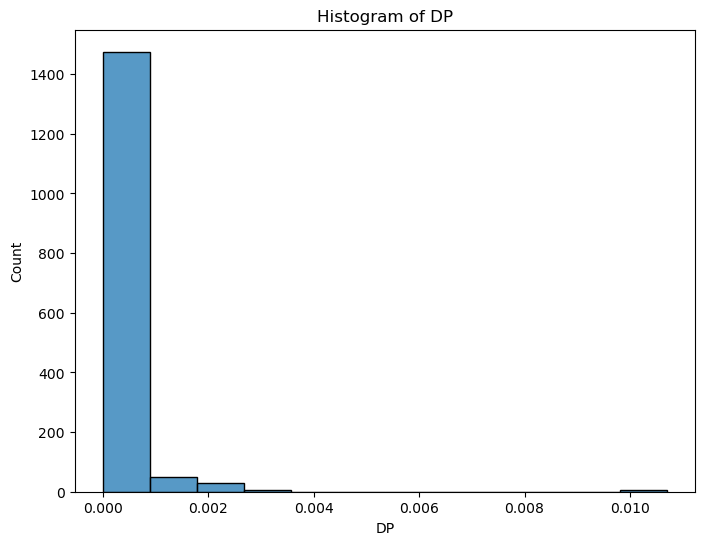

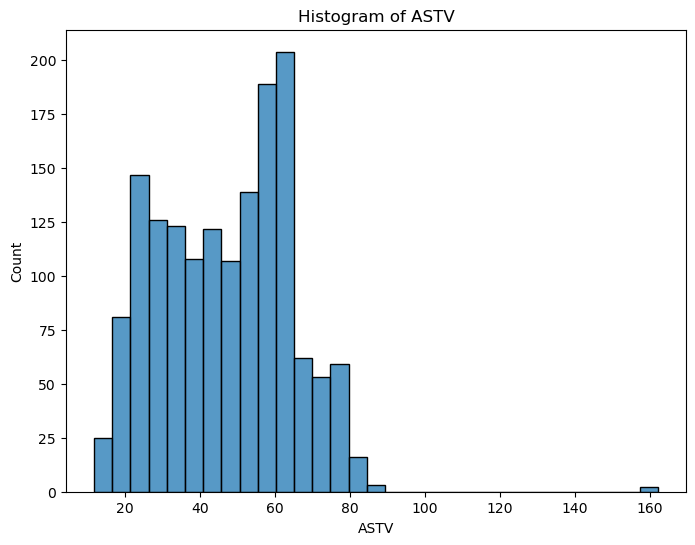

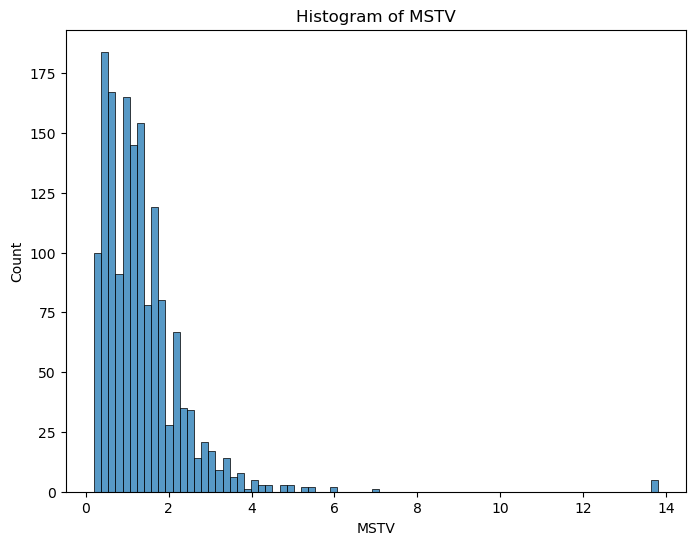

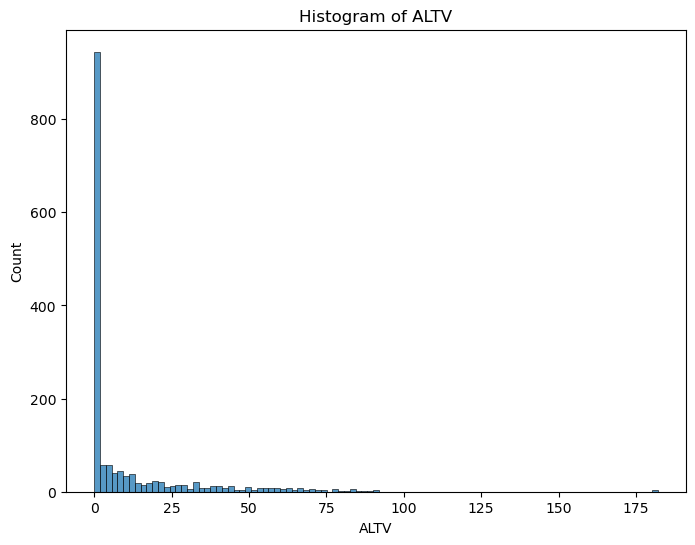

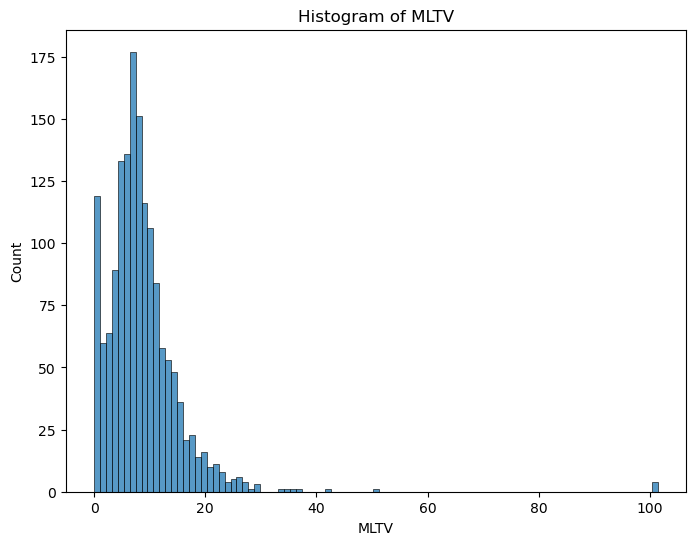

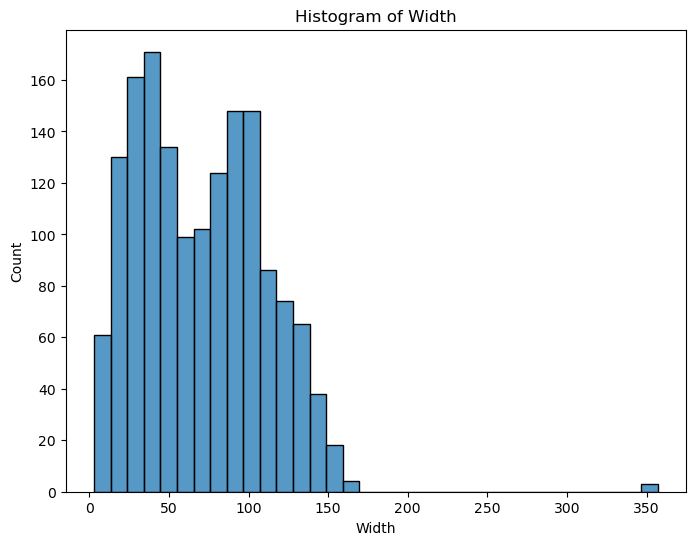

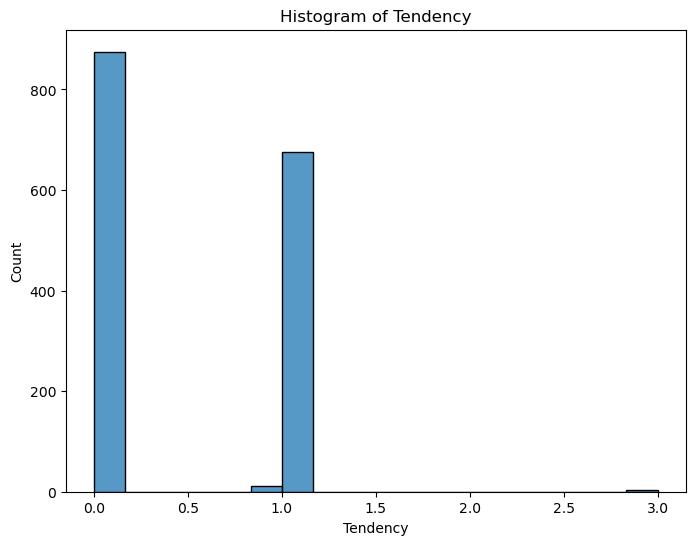

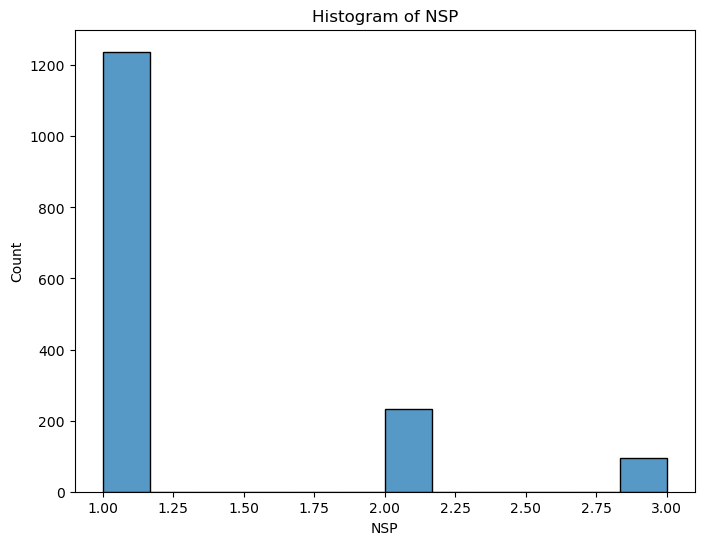

In [29]:
#3.	Data Visualization:

#Histogram

import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distribution of each column using histograms
for col in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=False)
    plt.title(f"Histogram of {col}")
    plt.show()



In [40]:
columns_to_log = ['FM', 'ALTV', 'AC','DL','UC','DS','DP','MSTV']  # Replace with your actual columns
for col in columns_to_log:
    df[f'{col}_log'] = np.log1p(df[col])  # log1p(x) = log(1 + x)

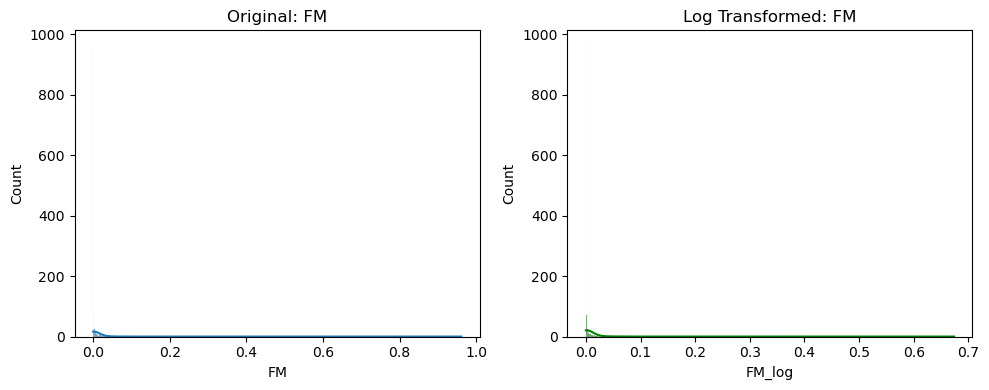

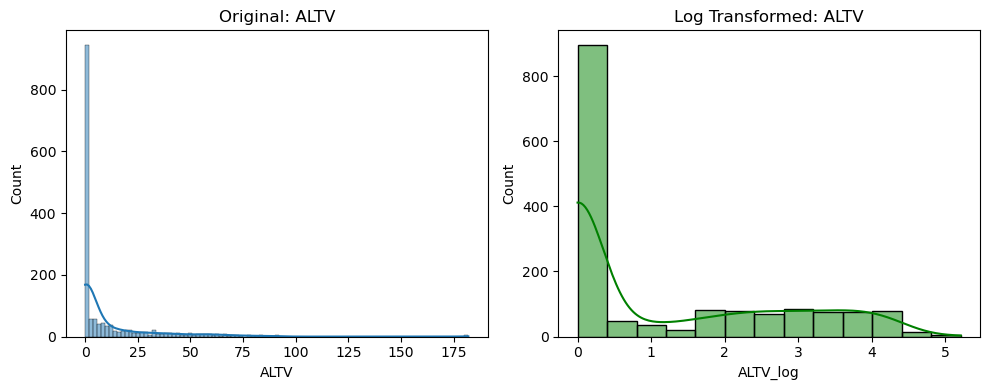

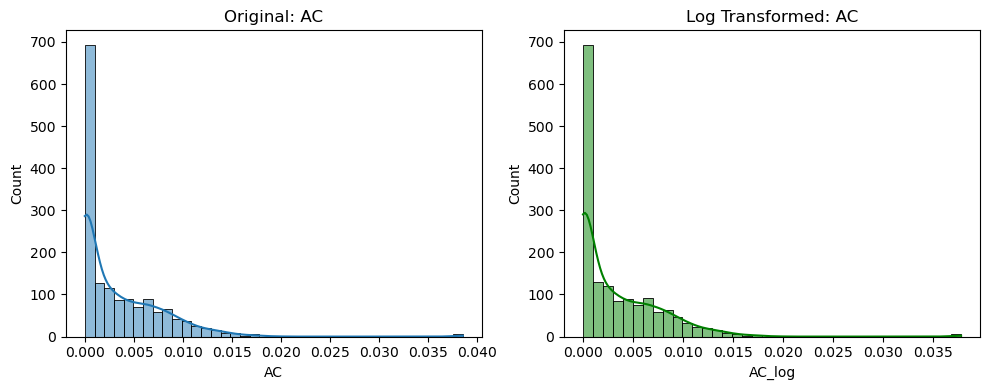

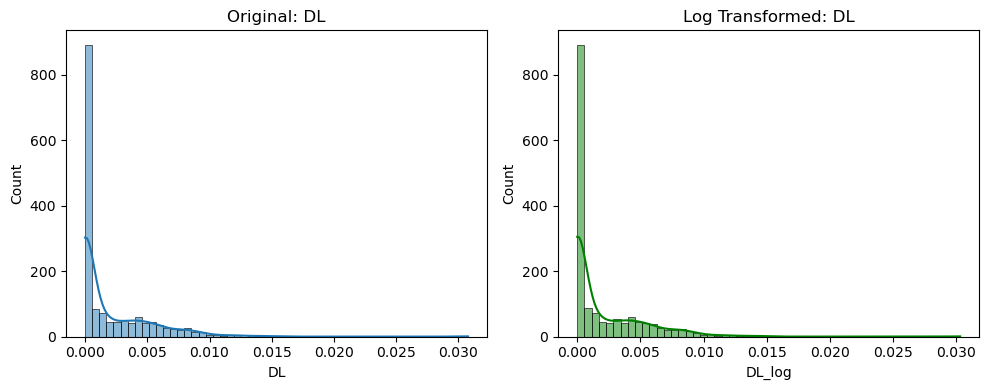

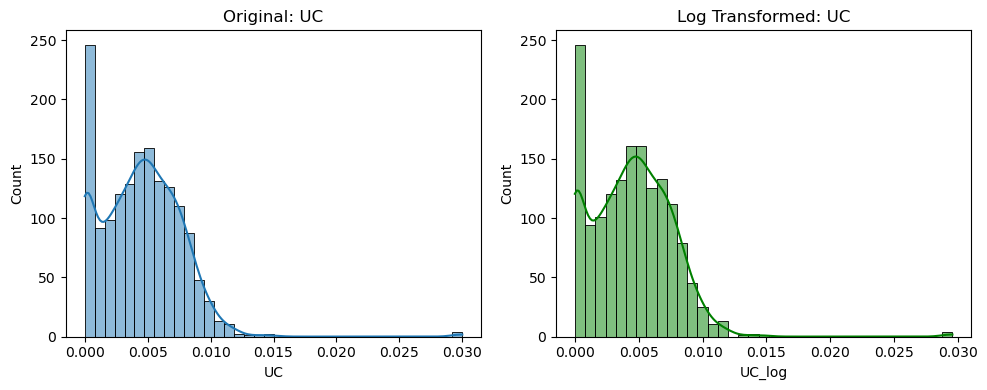

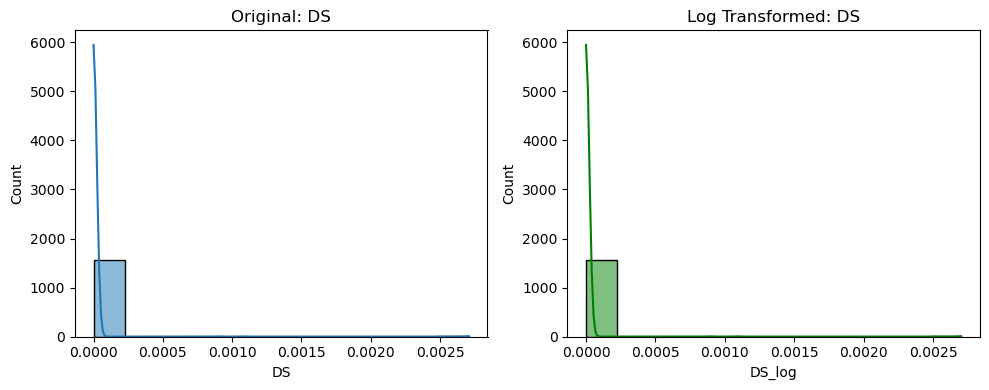

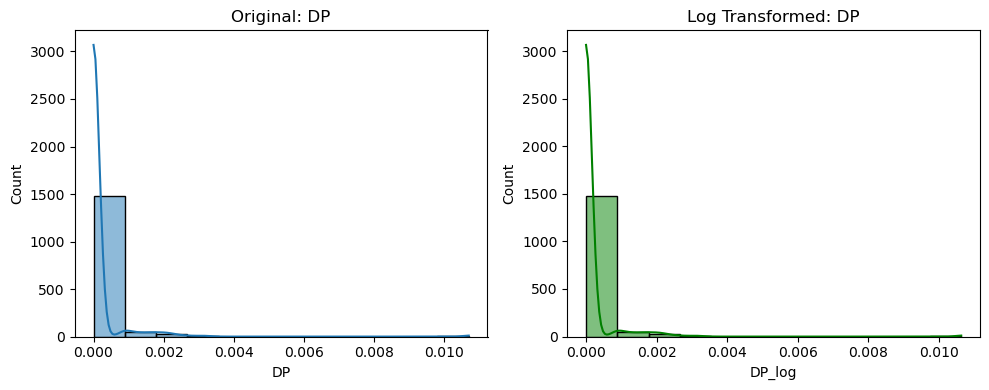

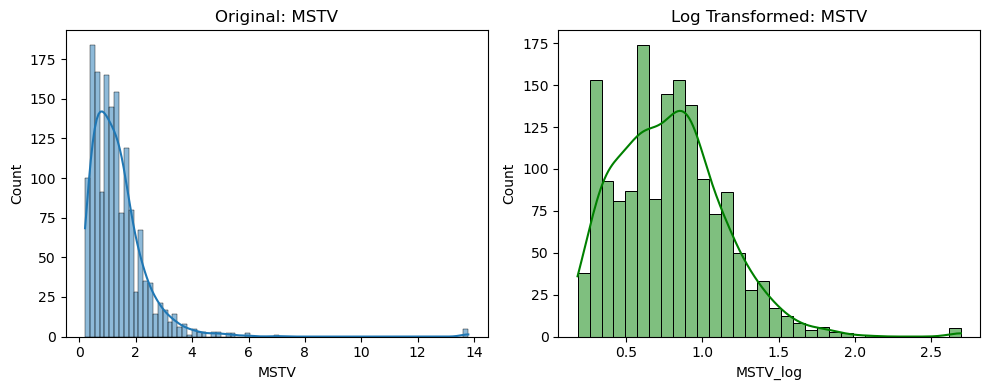

In [41]:
for col in columns_to_log:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    sns.histplot(df[col], kde=True, ax=axes[0])
    axes[0].set_title(f'Original: {col}')
    sns.histplot(df[f'{col}_log'], kde=True, ax=axes[1], color='green')
    axes[1].set_title(f'Log Transformed: {col}')
    plt.tight_layout()
    plt.show()


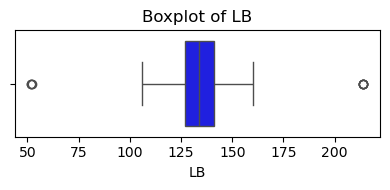

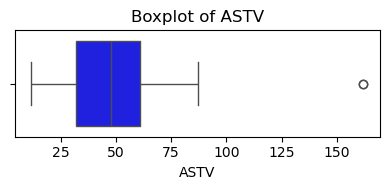

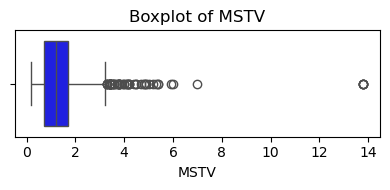

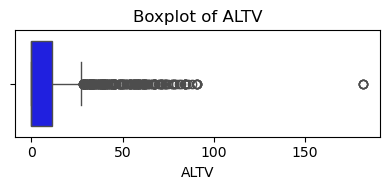

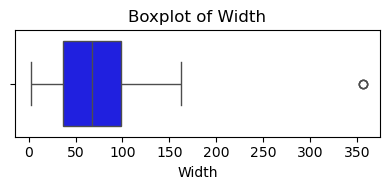

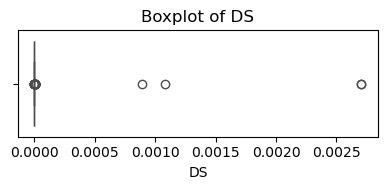

In [30]:
#boxplots

# Plot boxplots
for col in ['LB','ASTV','MSTV','ALTV','Width','DS']:
    plt.figure(figsize=(4,2))
    sns.boxplot(x=df[col], color='blue')
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


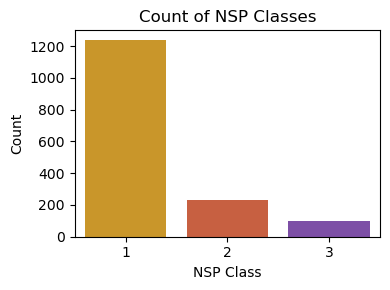

In [31]:
#barplot for categorial column

plt.figure(figsize=(4,3))
sns.countplot(x=df['NSP'], palette=['#e3a010','#dd542b','#7e40b4'])
plt.title("Count of NSP Classes")
plt.xlabel("NSP Class"); plt.ylabel("Count")
plt.tight_layout()
plt.show()

#dataset is highly imbalanced
#1233 1 class vs 236 2 class vs 128 3 class.

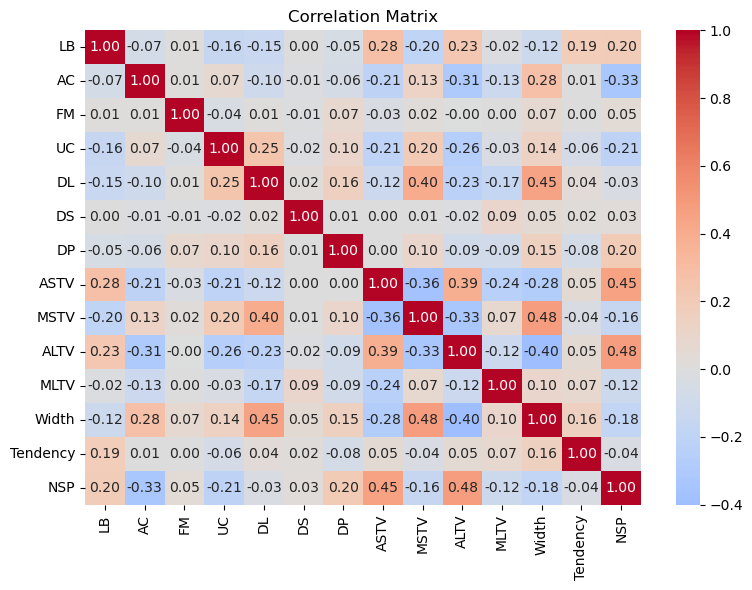

In [32]:
# Correlation heatmap of numeric features
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


#ASTV is moderately positively correlated with the class (NSP, r≈+0.48): higher ASTV tends to occur in 2/3 cases.


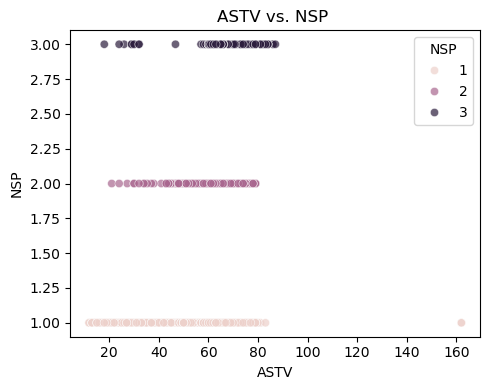

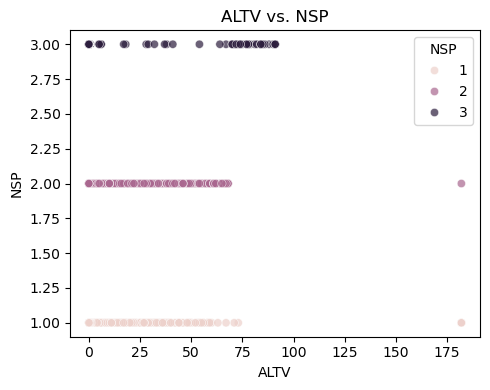

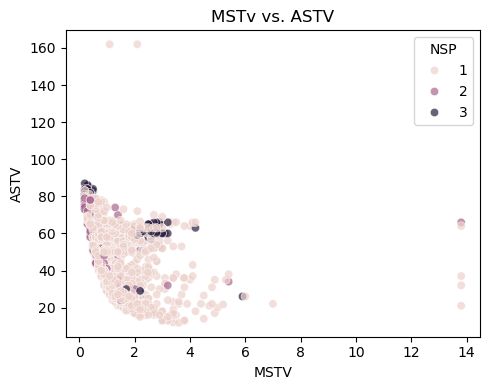

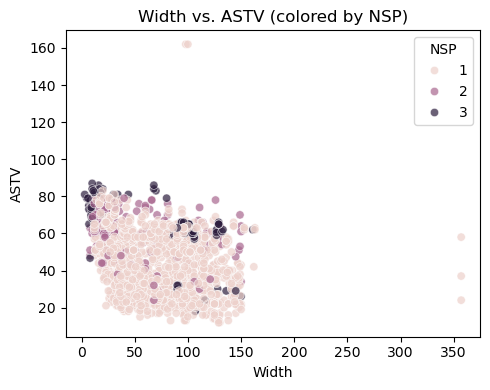

In [33]:
# Scatter plots for key features by class
plt.figure(figsize=(5,4))
sns.scatterplot(x='ASTV', y='NSP', hue='NSP', data=df, alpha=0.7)
plt.title("ASTV vs. NSP ")
plt.tight_layout()
plt.show()

plt.figure(figsize=(5,4))
sns.scatterplot(x='ALTV', y='NSP', hue='NSP', data=df, alpha=0.7)
plt.title("ALTV vs. NSP")
plt.tight_layout()
plt.show()


plt.figure(figsize=(5,4))
sns.scatterplot(x='MSTV', y='ASTV', hue='NSP', data=df, alpha=0.7)
plt.title("MSTv vs. ASTV")
plt.tight_layout()
plt.show()

plt.figure(figsize=(5,4))
sns.scatterplot(x='Width', y='ASTV', hue='NSP', data=df, alpha=0.7)
plt.title("Width vs. ASTV (colored by NSP)")
plt.tight_layout()
plt.show()


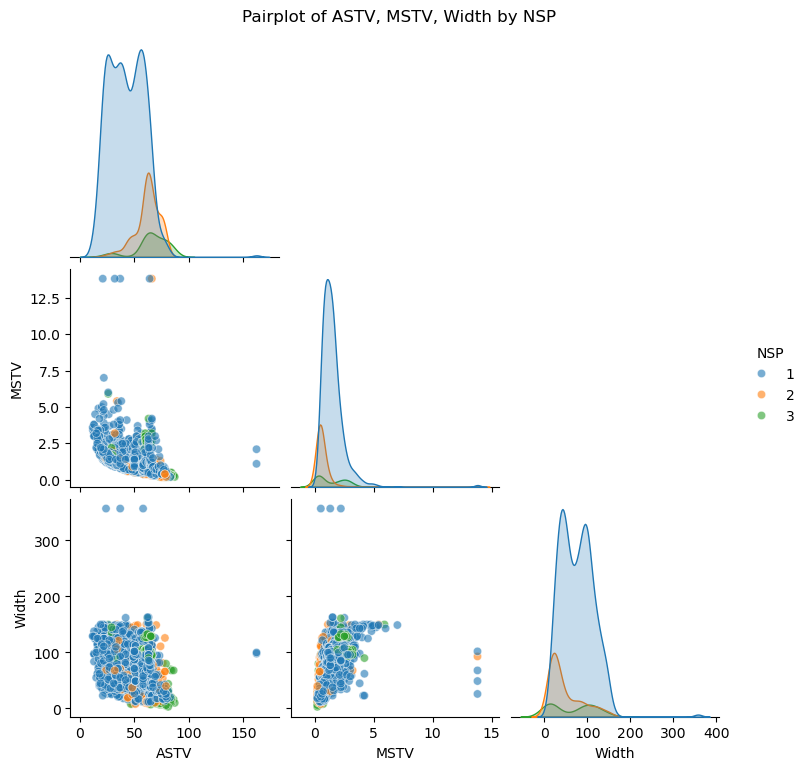

In [34]:
# Pairplot of ASTV, MSTV, Width by NSP class
sns.pairplot(df[['ASTV','MSTV','Width','NSP']].astype({'NSP': 'category'}), 
             hue='NSP', corner=True, plot_kws={'alpha':0.6})
plt.suptitle("Pairplot of ASTV, MSTV, Width by NSP", y=1.02)
plt.show()


In [35]:
#Pattern Recognition and Insights

#Correlated features: The heatmap and scatter plots highlight that ASTV and ALTV  correlate strongly with the NSP classification. 
#Higher ASTV/ALTV tends to accompany class 2/3 (non-normal). Conversely, MSTV (mean STV) is lower for suspect/pathological cases.

#The dataset is dominated by normal cases. Caution is needed in any model, but for EDA we note how the rare pathological cases differentiate.

#Baseline heart rate (LB): A slight trend towards a higher baseline is observed in class 2/3

In [38]:
#Conclusion

#Data cleaning was crucial: we removed ~25% of records due to missing, invalid class values, or impossible negatives. 
#This left 1566 valid samples.
#NSP is a Classification variable ,we found out while examining NSP variable that there are some of invalid values that missing leading to it is another independent variable.

#Data Visualization summaries highlight that fetal movement and deceleration counts are mostly zero, with occasional spikes. 
#Variability metrics (ASTV, ALTV) vary widely, indicating different fetal conditions.

#Key predictors: ASTV and ALTV (abnormal variability percentages) and prolonged decelerations (DP) have strong positive correlations with adverse fetal state (NSP=2 or 3). 
#Mean STV (MSTV) is inversely correlated.


#Overall, this Dataset suggests that features reflecting fetal heart rate variability (ASTV, MSTV, ALTV) and decelerations (DP) are most indicative of fetal condition.

In [37]:
df.shape

(1566, 14)